# Santander Customer Satisfaction scores are provided to us in form of train and test data. The test data is wothout a target.Our goal is to identify the target and upload the scores to kaggle



## Step1: Import required modules to the notebook

In [72]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Step2: we read the input data train and set and load into into the Jupyter Notebook

In [91]:
#read train data
trainfile =r'/Users/anandvasudevan/Documents/ASU study/CIS 508/Assignment Decision Tree/Santander Customer Satisfaction - TRAIN.csv'
trainData = pd.read_csv(trainfile)




#Read test data file
testfile = r'/Users/anandvasudevan/Documents/ASU study/CIS 508/Assignment Decision Tree/Santander Customer Satisfaction - TEST-Without TARGET.csv'
testData = pd.read_csv(testfile)

# deleting ID in both test and train data as it is not used in the decision tree model
trainData.set_index("ID")
testData.set_index("ID")

trainData.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979,0


In [74]:
testData.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


## Step3: Getting a summary statistics of data to identify gaps and missing data(if any)

In [75]:
#Data Description
trainData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 370 entries, var3 to TARGET
dtypes: float64(111), int64(259)
memory usage: 214.6 MB


In [76]:
trainData.describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,8237.820000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [77]:
# To check number of null values
trainData.isna().sum()

var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
imp_op_var39_comer_ult3    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 370, dtype: int64

In [78]:
# to find the event rate = a/(a+b)
trainData.groupby('TARGET').size()

TARGET
0    73012
1     3008
dtype: int64

## Step4: Creating separate dataframes for X and Y train set and X test test

In [79]:
#Copy Train data excluding target
X_Train = trainData.iloc[:, :-1].copy()

X_Train.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979


In [80]:
#Separate Train data and test data
Y_Train = trainData.iloc[:, -1]

Y_Train.head()


0    0
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

## Step5:Plotting the decision tree

In [81]:
#Create Decision Tree Classifier
clf=DecisionTreeClassifier(class_weight ='balanced', max_depth =5, min_weight_fraction_leaf =0.1, random_state=2)

#Apply Classifier on Train and Target - train decision tree model
clf.fit(X_Train,Y_Train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       min_weight_fraction_leaf=0.1, random_state=2)

In [82]:
# check accuracy on training set
X_Pred_train = clf.predict(X_Train)
#Model Accuracy
print("TRAIN Accuracy:", accuracy_score(Y_Train,X_Pred_train))

TRAIN Accuracy: 0.7535911602209945


In [83]:
#predicting auc score

auc_train = metrics.roc_auc_score(Y_Train, X_Pred_train)
auc_train

0.7411914162900649

## Step6: Predicting Y values for test data 

In [84]:
X_Pred_test = clf.predict(testData)

In [85]:
X_Pred_test

array([1, 1, 0, ..., 0, 1, 0])

## Step7: Converting the data into a data frame 

In [92]:
result = pd.DataFrame(testData['ID'])
result.head()

,ID
0,2
1,5
2,6
3,7
4,9


In [93]:
result['TARGET'] = X_Pred_test
result.head()

,ID,TARGET
0,2,1
1,5,1
2,6,0
3,7,0
4,9,0


## Step8: Exporting data to csv 

In [ ]:
result.to_csv('output.csv', index=False)

## Step9: Visualization of the tree 

In [94]:
import matplotlib.pyplot as plt
from sklearn import tree

In [95]:
#Visualize decision tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_1 <= 26.50
|   |--- feature_328 <= 1.57
|   |   |--- class: 0
|   |--- feature_328 >  1.57
|   |   |--- class: 0
|--- feature_1 >  26.50
|   |--- feature_182 <= 57.78
|   |   |--- feature_164 <= 2.96
|   |   |   |--- feature_368 <= 85487.64
|   |   |   |   |--- class: 1
|   |   |   |--- feature_368 >  85487.64
|   |   |   |   |--- class: 1
|   |   |--- feature_164 >  2.96
|   |   |   |--- class: 1
|   |--- feature_182 >  57.78
|   |   |--- feature_182 <= 1559.94
|   |   |   |--- class: 0
|   |   |--- feature_182 >  1559.94
|   |   |   |--- class: 0



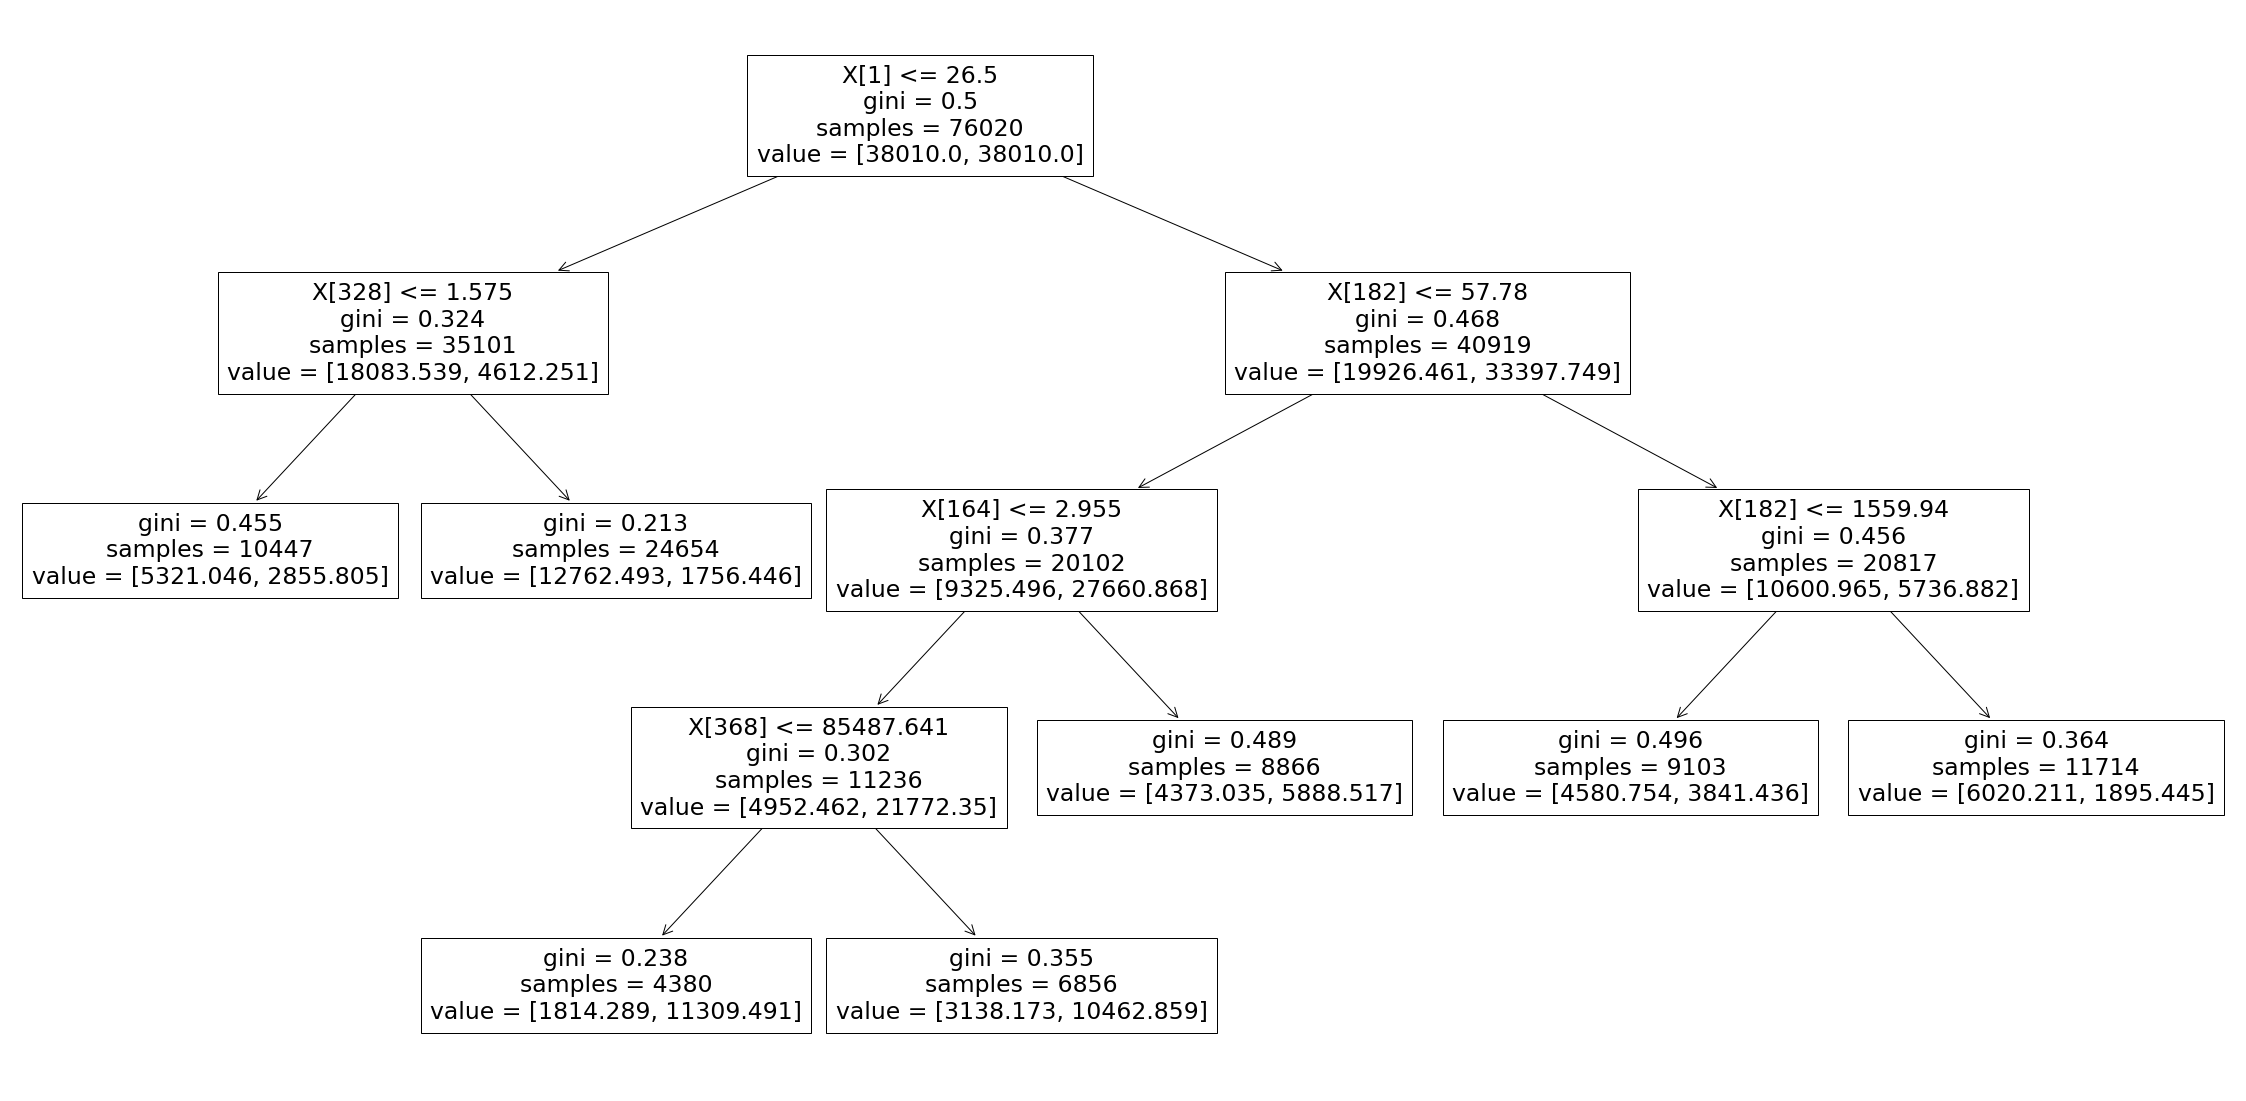

In [96]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(clf)

